# Import Module

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

# Load Data & Preprocessing

In [2]:
!wget https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/nlp_kaggle_spam.csv

--2021-04-29 03:13:05--  https://raw.githubusercontent.com/AlvinChiew/MachineLearning/main/raw_data/nlp_kaggle_spam.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/plain]
Saving to: ‘nlp_kaggle_spam.csv.1’

nlp_kaggle_spam.csv 100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2021-04-29 03:13:05 (9.58 MB/s) - ‘nlp_kaggle_spam.csv.1’ saved [503663/503663]



In [3]:
df_spam = pd.read_csv('nlp_kaggle_spam.csv', encoding='ISO-8859-1')
df_spam.drop(df_spam.columns[2:], axis=1, inplace=True)

In [4]:
df_spam.columns = ['y', 'X']
df_spam['y'] = df_spam['y'].map({'ham':0, 'spam':1})

In [5]:
df_spam.tail(5)

,y,X
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [6]:
# feat_extr = CountVectorizer(decode_error='ignore')
feat_extr = TfidfVectorizer(decode_error='ignore')

X = feat_extr.fit_transform(df_spam['X'])
y = df_spam['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeling & Analysis

Naïve Bayes Classification 
* Assumes that features are independent to one another 
* Likelihood distribution 
    * GaussianNB : Real value / bell curve 
    * MultinomialNB : categorical 
    * BernoulliNB : binary 

In [7]:
model = BernoulliNB()
# model = MultinomialNB()   # 
model.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.988332959389724
0.97847533632287


In [8]:
def vis_label(label, df):
    words = ''
    for msg in df[df['y'] == label]['X']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width=800, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

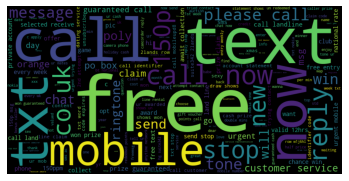

In [9]:
# Spam
vis_label(1, df_spam)

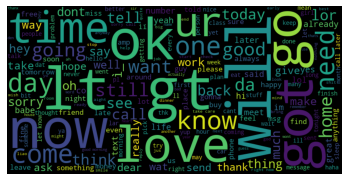

In [10]:
# Ham
vis_label(0, df_spam)

Insight to incorrect predictions

In [11]:
df_spam['pred'] = model.predict(X)

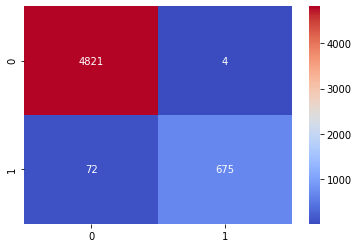

In [12]:
cm = confusion_matrix(df_spam['y'], df_spam['pred'])
sns.heatmap(cm, fmt='', cmap='coolwarm', annot=True)

# TN, FP
# FN, TP

# data is heavily skewed towards "Ham"
# incorrect preds are mostly "Ham" when it's actually "Spam"
# This is ok as wrongly labeled "Ham" as "Spam" is more serious

In [13]:
FN = df_spam[(df_spam['pred'] == 0) & (df_spam['y'] == 1)].reset_index(drop=True)
for i in range(3):
    print(FN['X'][i])

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
100 dating service cal;l 09064012103 box334sk38ch


In [14]:
FP = df_spam[(df_spam['pred'] == 1) & (df_spam['y'] == 0)].reset_index(drop=True)
row = 3 if len(FP) >= 3 else len(FP)
for i in range(row):
    print(FP['X'][i])

Indians r poor but India is not a poor country. Says one of the swiss bank directors. He says that \ &lt;#&gt;  lac crore\" of Indian money is deposited in swiss banks which can be used for 'taxless' budget for  &lt;#&gt;  yrs. Can give  &lt;#&gt;  crore jobs to all Indians. From any village to Delhi 4 lane roads. Forever free power suply to more than  &lt;#&gt;  social projects. Every citizen can get monthly  &lt;#&gt; /- for  &lt;#&gt;  yrs. No need of World Bank &amp; IMF loan. Think how our money is blocked by rich politicians. We have full rights against corrupt politicians. Itna forward karo ki pura INDIA padhe.g.m.\""
Ee msg na poortiyagi odalebeku: Hanumanji 7 name 1-Hanuman 2-Bajarangabali 3-Maruti 4-Pavanaputra 5-Sankatmochan 6-Ramaduth 7-Mahaveer ee 7 name  &lt;#&gt;  janarige ivatte kalisidare next saturday olage ondu good news keluviri...! Maretare inde 1 dodda problum nalli siguviri idu matra  &lt;#&gt; % true.. Don't neglet.
Plz note: if anyone calling from a mobile Co. 